# Importación de Librerías

In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, SimpleRNN, Dense, Dropout


# Análisis Exploratorio de Datos

In [11]:
#data = pd.read_csv(r'C:\Users\lfsoto\Documents\Aprendizaje de Maquinas\Proyecto Final\89cement data .csv')
data = pd.read_csv('89cement data .csv')
data.head()

,Month,Production,Sales,demand,population,gdp,disbusment,interestrate,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Jan-10,347.0,322.0,346.0,122.4,182277.0,60314.00,10.25,NaN,NaN,NaN,NaN,NaN,NaN
1,Feb-10,306.0,285.0,338.0,122.5,181018.0,61213.92,10.33,NaN,NaN,NaN,NaN,NaN,NaN
2,Mar-10,236.0,245.0,276.0,122.6,179759.0,62113.83,10.42,NaN,NaN,NaN,NaN,NaN,NaN
3,Apr-10,234.0,212.0,245.0,122.8,178500.0,63013.75,10.50,NaN,NaN,NaN,NaN,NaN,NaN
4,May-10,296.0,289.0,312.0,122.9,177354.0,63913.67,10.58,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Month         155 non-null    object 
 1   Production    155 non-null    float64
 2   Sales         155 non-null    float64
 3   demand        155 non-null    float64
 4   population    155 non-null    float64
 5   gdp           155 non-null    float64
 6   disbusment    155 non-null    float64
 7   interestrate  155 non-null    float64
 8   Unnamed: 8    0 non-null      float64
 9   Unnamed: 9    0 non-null      float64
 10  Unnamed: 10   0 non-null      float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
dtypes: float64(13), object(1)
memory usage: 109.4+ KB


In [15]:
columanas_eliminar = ['Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13']
df = data.copy()
df = df.drop(columns=columanas_eliminar)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Month         155 non-null    object 
 1   Production    155 non-null    float64
 2   Sales         155 non-null    float64
 3   demand        155 non-null    float64
 4   population    155 non-null    float64
 5   gdp           155 non-null    float64
 6   disbusment    155 non-null    float64
 7   interestrate  155 non-null    float64
dtypes: float64(7), object(1)
memory usage: 62.6+ KB


In [19]:
df = df.dropna(subset=['Month'])
df.info() 


<class 'pandas.core.frame.DataFrame'>
Index: 155 entries, 0 to 154
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Month         155 non-null    object 
 1   Production    155 non-null    float64
 2   Sales         155 non-null    float64
 3   demand        155 non-null    float64
 4   population    155 non-null    float64
 5   gdp           155 non-null    float64
 6   disbusment    155 non-null    float64
 7   interestrate  155 non-null    float64
dtypes: float64(7), object(1)
memory usage: 10.9+ KB


In [21]:
df['Month'] = pd.to_datetime(df['Month'], format='%b-%y')

In [23]:
df.head()

,Month,Production,Sales,demand,population,gdp,disbusment,interestrate
0,2010-01-01,347.0,322.0,346.0,122.4,182277.0,60314.00,10.25
1,2010-02-01,306.0,285.0,338.0,122.5,181018.0,61213.92,10.33
2,2010-03-01,236.0,245.0,276.0,122.6,179759.0,62113.83,10.42
3,2010-04-01,234.0,212.0,245.0,122.8,178500.0,63013.75,10.50
4,2010-05-01,296.0,289.0,312.0,122.9,177354.0,63913.67,10.58


In [25]:
df = df.sort_values('Month')
df.reset_index(drop=True, inplace=True)


In [27]:
df = df.rename(columns={'Sales ': 'Sales'})


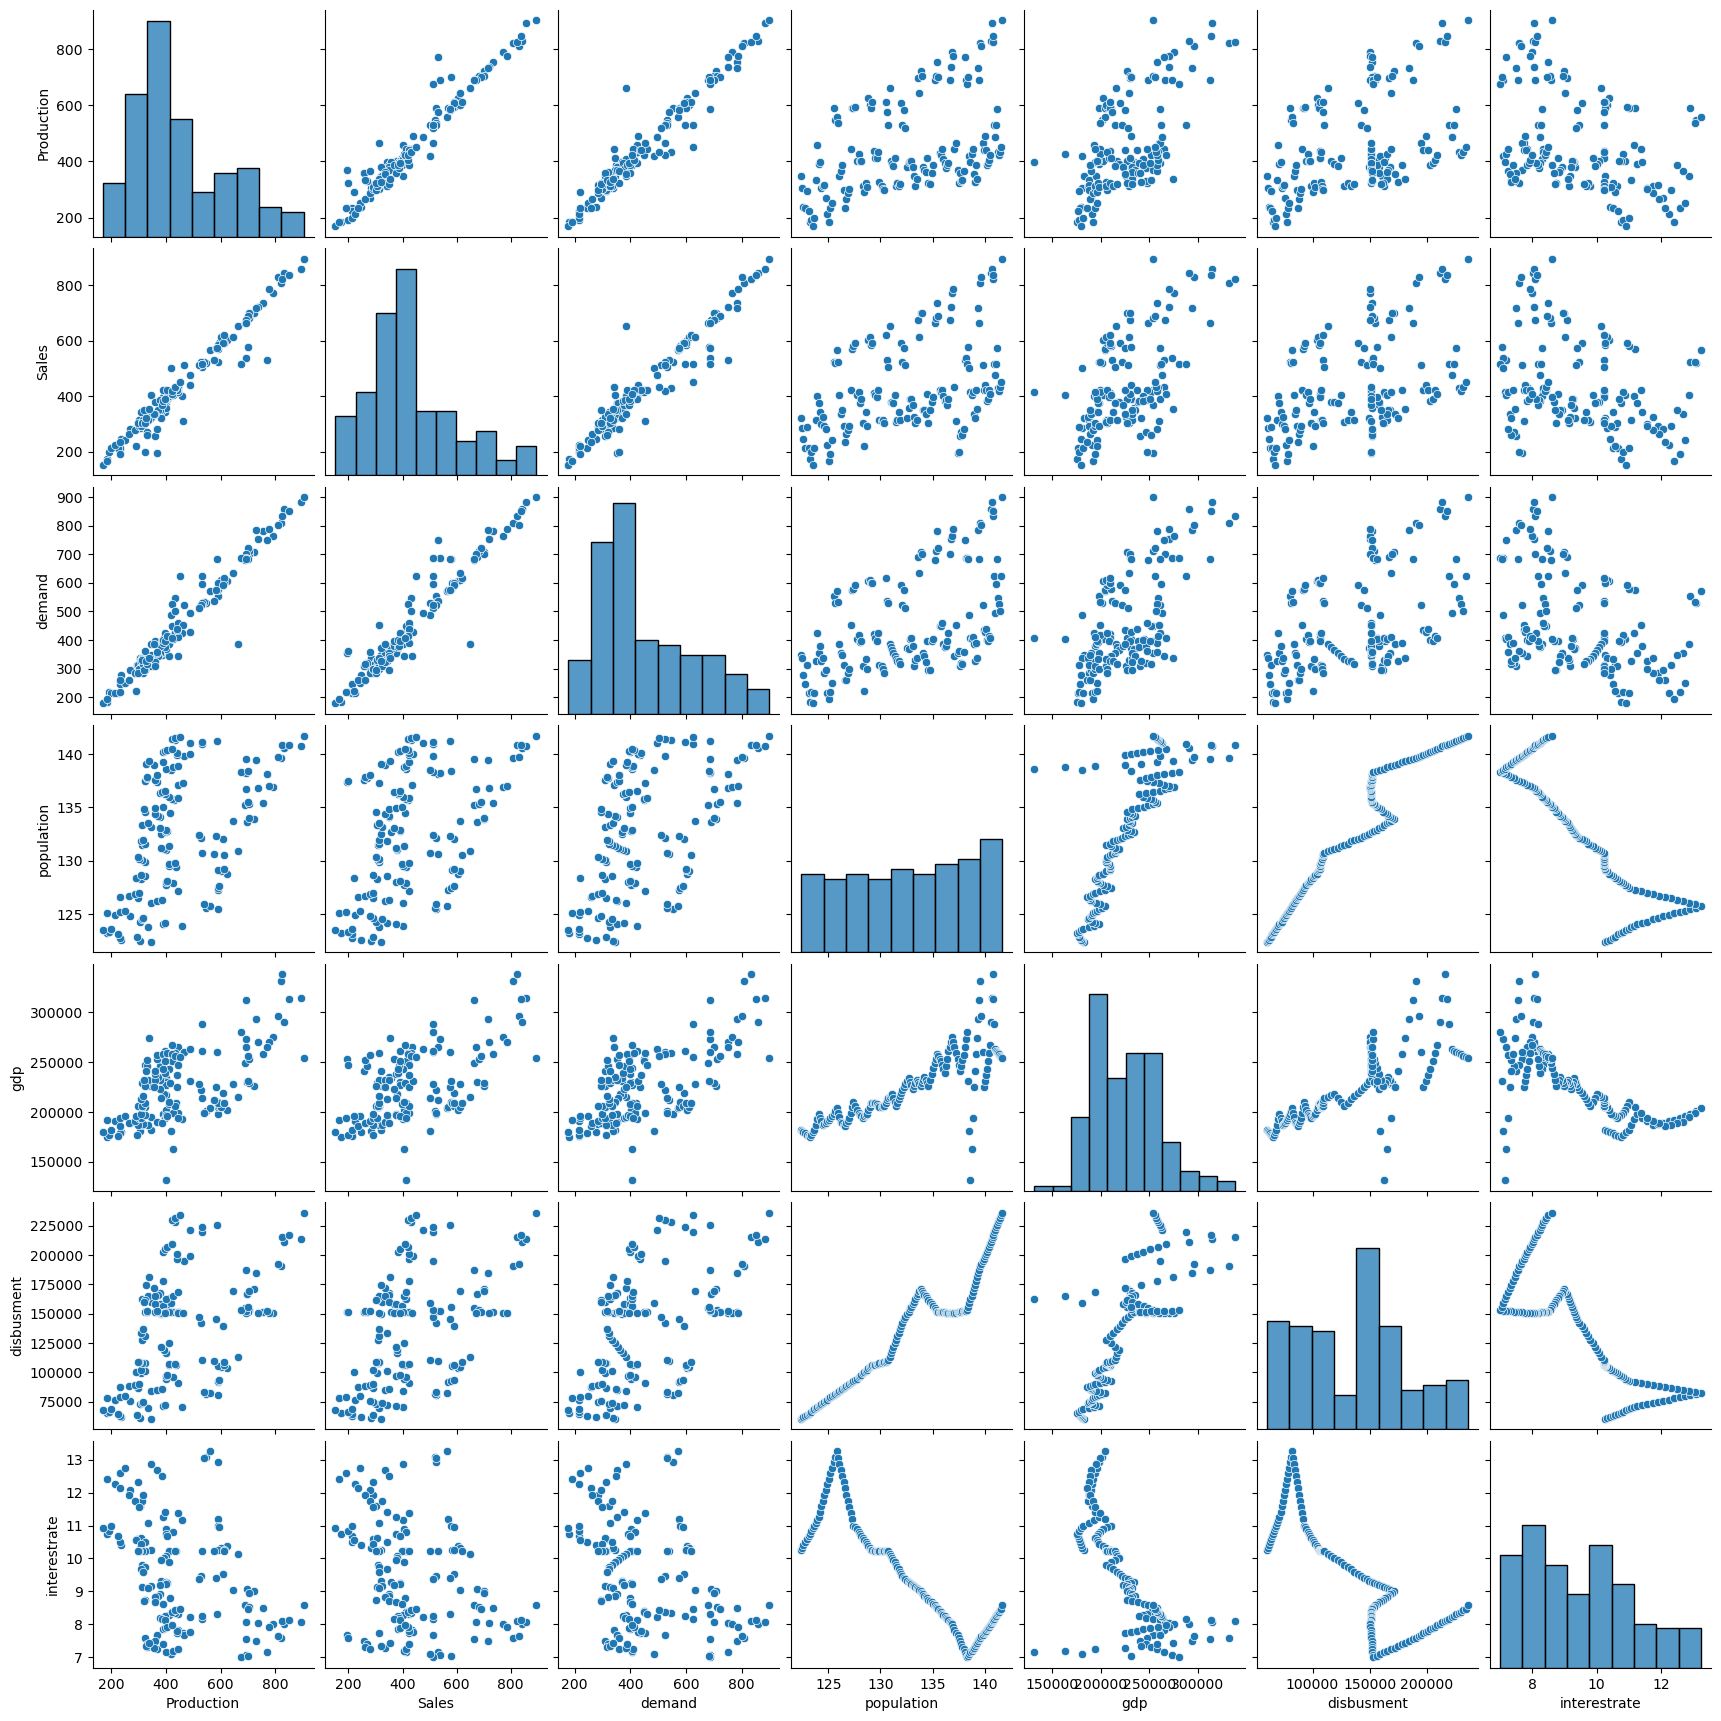

In [54]:
sns.pairplot(df)

## Análisis General del Pairplot

Se observa que hay relaciones lineales claras y fuertes entre:

- Production y Sales
- Production y Demand
- Sales y Demand

Analisis de variables económicas vs demanda
- gdp (PIB):
Muestra una tendencia creciente respecto a demand, aunque no estrictamente lineal.
- population:
Tiene un patrón casi lineal creciente con demand, lo cual es lógico pues a mayor población, debería ser mayor la demanda de cemento.
- disbursement:
También tiene una relación creciente, aunque con más dispersión.
- interest_rate:
Parece tener una relación inversa con demand, aunque con bastante ruido.

Analisis de Distribuciones 
- Production, Sales, Demand tienen distribuciones asimétricas hacia la derecha (sesgo positivo).


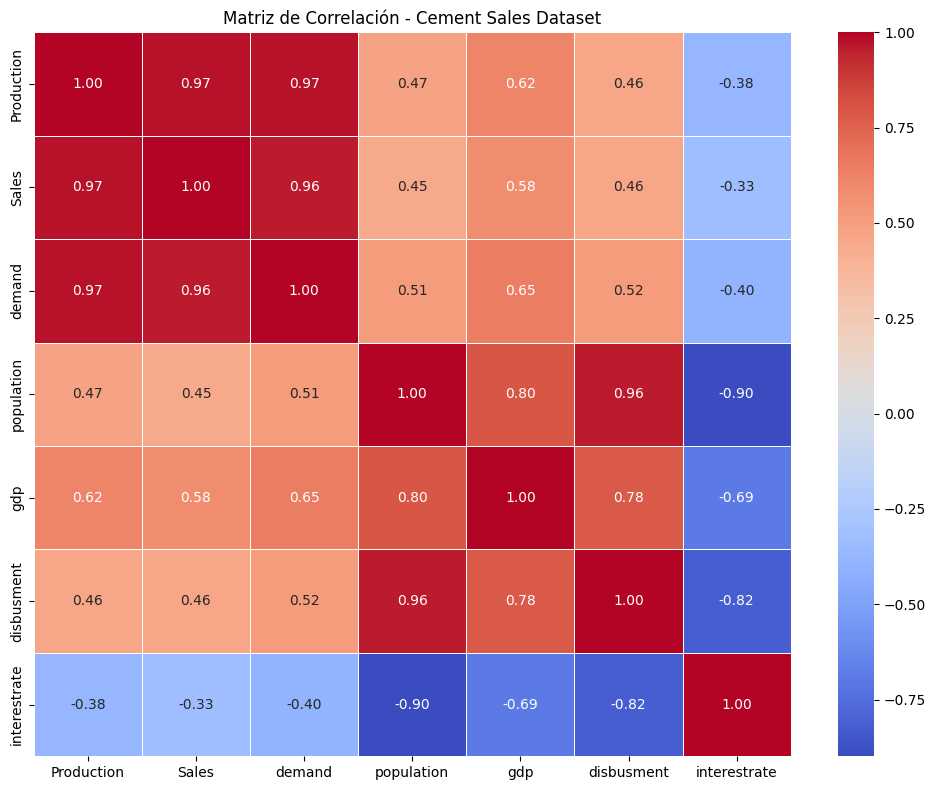

In [12]:
# Solo variables numéricas
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Matriz de Correlación - Cement Sales Dataset')
plt.tight_layout()
plt.show()

### Análisis de Correlación
Se construyó una matriz de correlación utilizando únicamente variables numéricas del conjunto de datos. La visualización permite identificar las relaciones lineales existentes entre la producción, ventas, demanda de cemento y variables macroeconómicas.

🔹 Correlaciones entre variables operativas

Existe una correlación positiva muy alta entre:

Production y Sales (r = 0.97)

Production y Demand (r = 0.97)

Sales y Demand (r = 0.96)

Esto indica que estas variables están estrechamente relacionadas y podrían considerarse colineales, lo cual es importante tener en cuenta en el modelado para evitar redundancia.

🔹 Correlaciones con variables macroeconómicas

GDP (Producto Interno Bruto) tiene una correlación moderada-alta con la demand (r = 0.65) y la production (r = 0.62), lo que sugiere que el comportamiento económico del país incide directamente en el consumo de cemento.

Population también se correlaciona con demand (r = 0.51), lo que es lógico dado que el crecimiento poblacional está asociado al desarrollo urbano.

Disbursement (desembolsos) tiene una correlación de 0.52 con la demand, lo cual podría reflejar inversiones públicas o privadas en infraestructura.

🔹 Tasa de interés

Se observa una correlación negativa significativa entre interest_rate y:

Population (r = -0.90)

Disbursement (r = -0.82)

GDP (r = -0.69)

Demand (r = -0.40)

Esto sugiere que tasas de interés más altas están asociadas con una menor inversión, menor crecimiento económico y menor demanda de cemento, probablemente por la reducción en la construcción y el crédito.

-  Conclusión

Las variables gdp, disbursement, population e interest_rate muestran potencial como predictores de la demanda de cemento. Adicionalmente, la alta colinealidad entre production, sales y demand sugiere que solo una de estas variables debería usarse como variable objetivo o predictor para evitar sobreajuste en los modelos.



In [14]:
df.columns

Index(['Month', 'Production', 'Sales', 'demand', 'population', 'gdp',
       'disbusment', 'interestrate'],
      dtype='object')

In [29]:
df = df.drop(columns=['demand', 'Production'])

In [31]:
df.describe()

,Month,Sales,population,gdp,disbusment,interestrate
count,155,155.000000,155.000000,155.000000,155.000000,155.000000
mean,2016-05-31 20:35:36.774193664,432.696774,132.676774,225938.397032,136477.408194,9.472710
min,2010-01-01 00:00:00,152.000000,122.400000,131437.053000,60314.000000,7.000000
25%,2013-03-16 12:00:00,313.500000,127.800000,198254.490000,95231.040000,8.110000
50%,2016-06-01 00:00:00,400.000000,132.900000,224842.983000,150587.040000,9.230000
75%,2019-08-16 12:00:00,523.000000,137.750000,252742.619000,163955.765000,10.570000
max,2022-11-01 00:00:00,895.000000,141.700000,338282.980000,236163.040000,13.250000
std,NaN,164.812935,5.740105,35283.418396,46921.994709,1.629669


# 1. Random Forest

In [73]:
#Separamos entradas (X) y salidas (y)
X = df.drop(columns=['Sales','Month'], axis=1)
y = df['Sales']

# 2. Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [74]:
# 3. Escalamos las numéricas
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(108, 4) (47, 4) (108,) (47,)


In [88]:
#Instancia del regresor
RF = RandomForestRegressor(n_estimators=100,max_depth=15)

#Entrenamos
RF.fit(X_train,y_train)

#Predecimos
y_pred_rf=RF.predict(X_test)

In [89]:

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_rf))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_rf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))
print('R2_score:', metrics.r2_score(y_test, y_pred_rf))

MAE: 74.17762411347519
MSE: 9685.452959633569
RMSE: 98.41469890028404
R2_score: 0.6208253345230315


### Optimización de hiperparametros RF

In [69]:
param_grid = {
    'n_estimators': np.arange(10,1010,100),              # Número de árboles
    'max_depth': np.arange(1,101,1),                 # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],                        # Mínimo de muestras para dividir un nodo interno
    'min_samples_leaf': [1, 2, 4],                          # Mínimo de muestras por hoja
    'max_features': [None, 'sqrt', 'log2'],              # Número de features para buscar la mejor división
    'criterion': ['squared_error', 'absolute_error']       # Función de pérdida
}

#Defimos el modelo base

RF_gridSearch = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=2),
    param_distributions=param_grid,
    n_iter=100,
    cv=3,
    scoring='neg_mean_absolute_error',
    verbose=2,
    n_jobs=-1
)

RF_gridSearch.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


,estimator,RandomForestR...andom_state=2)
,param_distributions,"{'criterion': ['squared_error', 'absolute_error'], 'max_depth': array([ 1, ...98, 99, 100]), 'max_features': [None, 'sqrt', ...], 'min_samples_leaf': [1, 2, ...], ...}"
,n_iter,100
,scoring,'neg_mean_absolute_error'
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [70]:
#Revisamos los parametros seleccionados
RF_gridSearch.best_params_

{'n_estimators': np.int64(710),
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': np.int64(63),
 'criterion': 'absolute_error'}

In [72]:
#Evaluamos el desempeño
y_pred = RF_gridSearch.best_estimator_.predict(X_test)
print("MAE: ", metrics.mean_absolute_error(y_test,y_pred))
print("MSE: ", metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2:  ", metrics.r2_score(y_test,y_pred))

MAE:  72.20848067126161
MSE:  9167.879360731364
RMSE: 95.74904365439565
R2:   0.6410877628308633


# 2. SVM

In [91]:
# Entradas y salidas
X = df.drop(columns=['Sales', 'Month'])
y = df['Sales']

# Escalamos los datos
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

# Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=2)


In [100]:
svr = SVR(kernel='poly')  # Puedes probar 'linear', 'poly', 'sigmoid' también

svr.fit(X_train, y_train)


,kernel,'poly'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [101]:
y_pred = svr.predict(X_test)

print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("R²: ", metrics.r2_score(y_test, y_pred))


MAE: 102.79583885826342
MSE: 18342.467101260936
R²:  0.2819129000853621


### Optimización de Hiperparametros SVM

In [108]:

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
    'kernel': ['poly']
}

grid = GridSearchCV(SVR(), param_grid, scoring='neg_mean_absolute_error', cv=3, verbose=2, n_jobs=-1)
grid.fit(X_train, y_train)

# Mejor modelo
best_svr = grid.best_estimator_


Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [109]:
best_svr

,kernel,'poly'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,100
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [111]:
y_pred_best = best_svr.predict(X_test)

print("MAE:", metrics.mean_absolute_error(y_test, y_pred_best))
print("MSE:", metrics.mean_squared_error(y_test, y_pred_best))
print("R²: ", metrics.r2_score(y_test, y_pred_best))


MAE: 91.3209407659961
MSE: 15864.85819020367
R²:  0.3789085216580713


# 3. División de los datos para RNN y LSTM

In [33]:
#Leer datos 
data = df[['Sales']]

# Escalamos
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Creamos ventanas de tiempo
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i - window_size:i])
        y.append(data[i])
    return np.array(X), np.array(y)

window_size = 12  # 12 meses anteriores
X, y = create_sequences(data_scaled, window_size)

# Dividimos en entrenamiento y prueba
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [35]:
print(X_train.shape)

(114, 12, 1)


## *Visualización datos de entrenamiento*

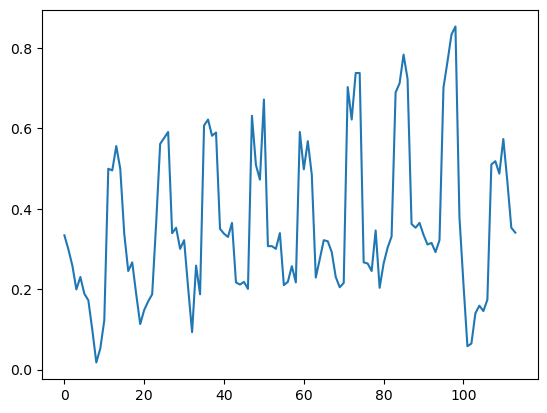

In [143]:
#Datos de entrenamiento
X_train_2D = X_train[:, -1, :]
plt.plot(X_train_2D)

## *Visualización datos de testeo*

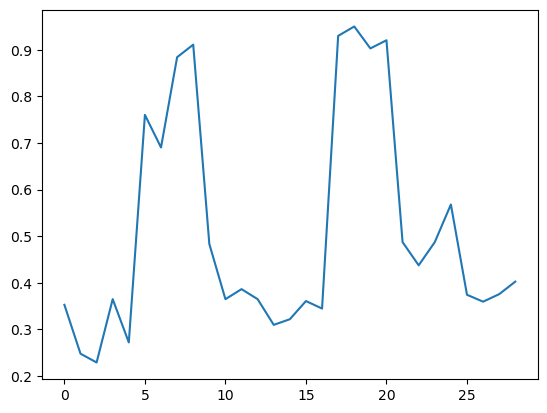

In [146]:
#Datos de prueba
X_test_2D = X_test[:, -1, :]
plt.plot(X_test_2D)

# 3.1. RNN

In [37]:
# Definción de la red
model = Sequential()
model.add(SimpleRNN(50, activation="tanh", input_shape=(window_size,1), return_sequences=True))
model.add(SimpleRNN(50, activation="tanh", return_sequences=True))
model.add(SimpleRNN(50, activation="tanh", return_sequences=True))
model.add(SimpleRNN(1))

#Compilación del modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenamiento
model.fit(X_train, y_train, epochs=50, verbose=1)

Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.1417  
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3256
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3459
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3005
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2807
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1176
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0543
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0524
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0538
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0262
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0299
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0221
Epoch 13/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0219
Epoch 14/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0171
Epoch 15/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0136
Epoch 16/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
MSE:  21024.65333746004
RMSE:  144.9988046070037
MAE:  119.2629236681708
R2_score:  0.3872676209198245


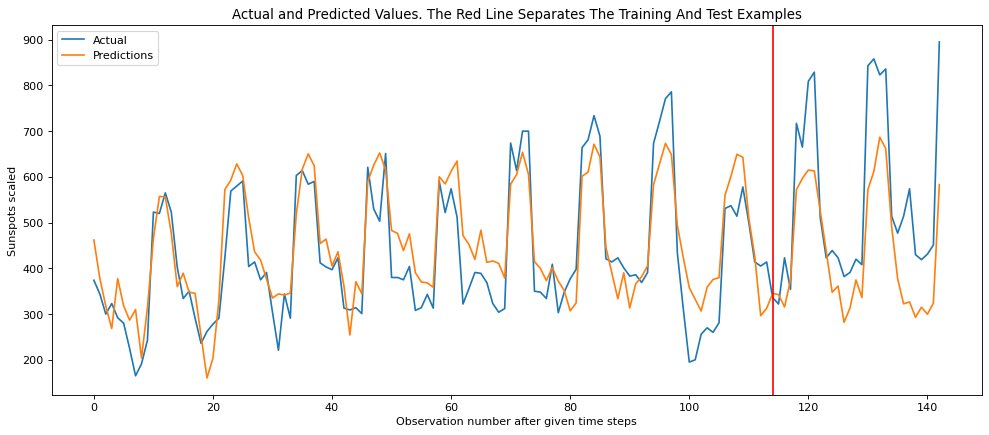

In [43]:
# Predicciones
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train) #Sobre datos de entrenamiento

# Inversión del escalado
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_train_pred_inv = scaler.inverse_transform(y_train_pred)
y_train_inv = scaler.inverse_transform(y_train)

# Métricas
print('MSE: ', metrics.mean_squared_error(y_test_inv,y_pred_inv))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test_inv,y_pred_inv)))
print('MAE: ', metrics.mean_absolute_error(y_test_inv,y_pred_inv))
print('R2_score: ', metrics.r2_score(y_test_inv,y_pred_inv))

# Visualización de los resultados
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Sunspots scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')
plot_result(y_train_inv, y_test_inv, y_train_pred_inv, y_pred_inv)

# 3.2. LSTM

In [ ]:
df


,Month,Sales,population,gdp,disbusment,interestrate
0,2010-01-01,322.0,122.4,182277.000,60314.00,10.25
1,2010-02-01,285.0,122.5,181018.000,61213.92,10.33
2,2010-03-01,245.0,122.6,179759.000,62113.83,10.42
3,2010-04-01,212.0,122.8,178500.000,63013.75,10.50
4,2010-05-01,289.0,122.9,177354.000,63913.67,10.58
5,2010-06-01,212.0,123.1,176208.000,64813.58,10.67
6,2010-07-01,174.0,123.2,175062.000,65713.50,10.75
7,2010-08-01,200.0,123.3,177418.000,66613.42,10.83
8,2010-09-01,152.0,123.5,179774.000,67513.33,10.92
9,2010-10-01,214.0,123.6,182130.000,68413.25,11.00


In [45]:
# Definción de la red
model_STM = Sequential()
model_STM.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)))
model_STM.add(Dense(1))

# Compilación del modelo
model_STM.compile(optimizer='adam', loss='mae')

# Entrenamiento
model_STM.fit(X_train, y_train, epochs=50, verbose=1)


Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3291  
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3036
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2427
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1751
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1411
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1631
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1569
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1485
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1363
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1465 
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1536 
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1424 
Epoch 13/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1420 
Epoch 14/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1437 
Epoch 15/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1433
Epoch 16/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - lo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MSE:  17782.528720112707
RMSE:  133.35114817695685
MAE:  94.66056034482759
R2_score:  0.4817545405458499


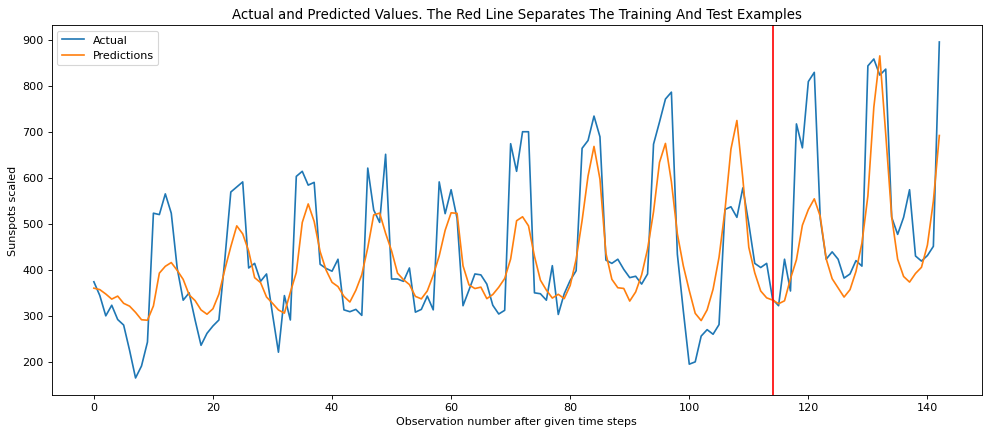

In [47]:
# Predicciones
y_pred = model_STM.predict(X_test)
y_train_pred = model_STM.predict(X_train) #Sobre datos de entrenamiento

# Inversión del escalado
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_train_pred_inv = scaler.inverse_transform(y_train_pred)
y_train_inv = scaler.inverse_transform(y_train)

# Métricas
print('MSE: ', metrics.mean_squared_error(y_test_inv,y_pred_inv))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test_inv,y_pred_inv)))
print('MAE: ', metrics.mean_absolute_error(y_test_inv,y_pred_inv))
print('R2_score: ', metrics.r2_score(y_test_inv,y_pred_inv))

# Visualización de los resultados
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Sunspots scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')
plot_result(y_train_inv, y_test_inv, y_train_pred_inv, y_pred_inv)